<a href="https://colab.research.google.com/github/mustopahasan/BasicDL/blob/master/TitanicCompetition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic Kaggle Competition, Using Tensorflow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Preparation

## Load the dat set

In [0]:
path = '/content/drive/My Drive/Bangkit Project/Datasets/Titanic Dataset/train.csv'
data = pd.read_csv(path)

### Eksplore the data
> Understand the data

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> Drop PassangerID and Name column, these column do not give us any information

In [0]:
data = data.drop(['PassengerId', 'Name'], axis=1)

In [0]:
data = data.drop(['Ticket'],axis=1)

### Eksplor Survived columns 
> this column is target variable

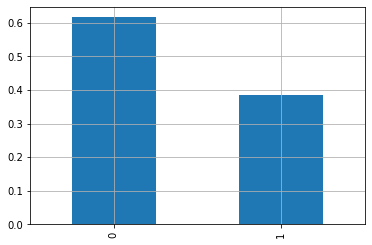

In [5]:
data.Survived.value_counts(normalize=True).plot(kind='bar').grid(True)

In [6]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


### SEX
> Sex variable

male      65.0
female    35.0
Name: Sex, dtype: float64


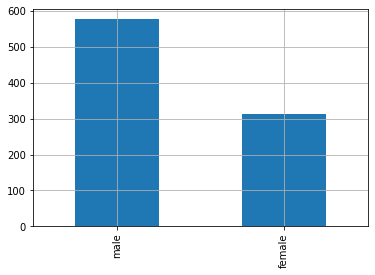

In [7]:
data.Sex.value_counts().plot(kind='bar').grid(True)
print(np.round(data.Sex.value_counts(normalize=True)*100))

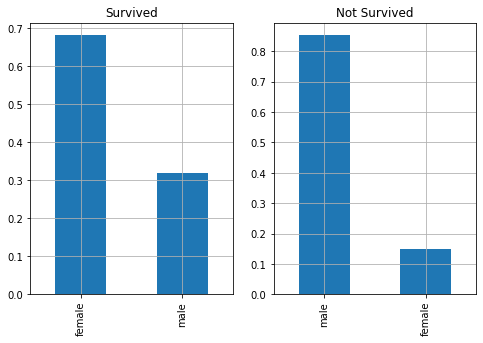

In [26]:
fig = plt.figure(figsize=(8,5))
plt.subplot2grid((1,2),(0,0)).set_title('Survived')
data[data.Survived == 1].Sex.value_counts(normalize=True).plot(kind='bar').grid(True)

plt.subplot2grid((1,2),(0,1)).set_title('Not Survived')
data[data.Survived==0].Sex.value_counts(normalize=True).plot(kind='bar').grid(True)

> More Females are survived than Males

### AGE

In [34]:
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [0]:
bins = [0,10,20,30,50,80]
labels = ['Anak-anak', 'Remaja', 'Dewasa', 'Tua', 'Lansia']
data['Age_binned'] = pd.cut(data['Age'], bins=bins, labels=labels)

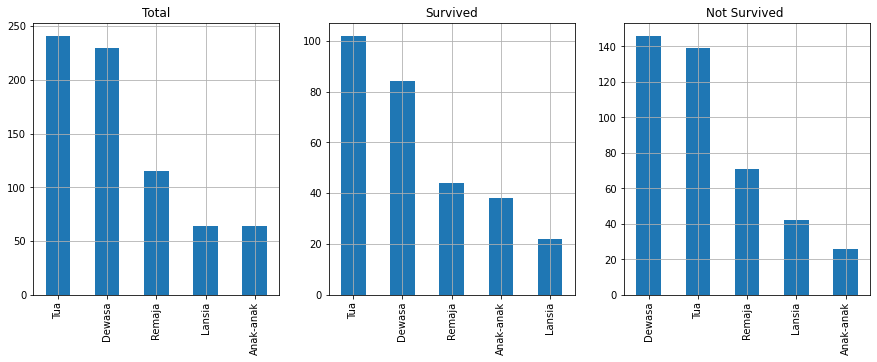

In [52]:
plt.figure(figsize=(15,5))
plt.subplot2grid((1,3),(0,0)).set_title('Total')
data.Age_binned.value_counts().plot(kind='bar').grid(True)

plt.subplot2grid((1,3),(0,1)).set_title('Survived')
data[data.Survived==1].Age_binned.value_counts().plot(kind='bar').grid(True)

plt.subplot2grid((1,3),(0,2)).set_title('Not Survived ')
data[data.Survived==0].Age_binned.value_counts().plot(kind='bar').grid(True)

In [53]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Age_binned'],
      dtype='object')

### Pclass

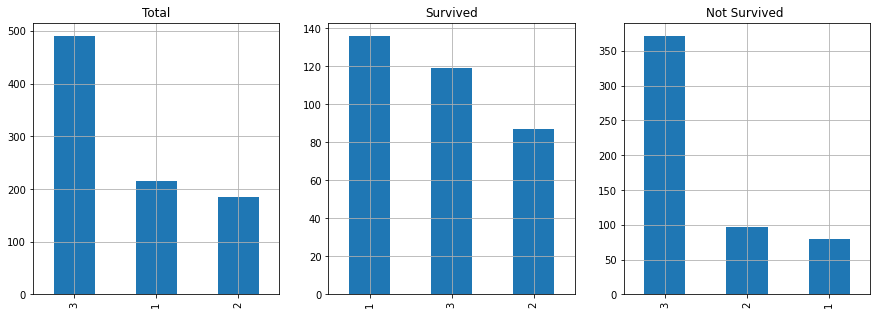

In [55]:
plt.figure(figsize=(15,5))
plt.subplot2grid((1,3),(0,0)).set_title('Total')
data.Pclass.value_counts().plot(kind='bar').grid(True)

plt.subplot2grid((1,3),(0,1)).set_title('Survived')
data[data.Survived==1].Pclass.value_counts().plot(kind='bar').grid(True)

plt.subplot2grid((1,3),(0,2)).set_title('Not Survived ')
data[data.Survived==0].Pclass.value_counts().plot(kind='bar').grid(True)

### Sibsp

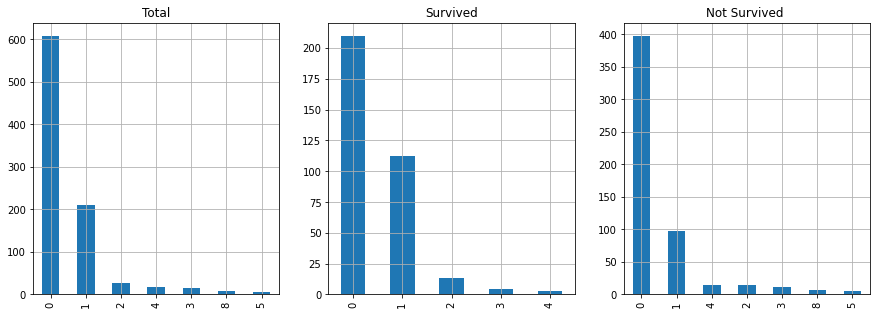

In [57]:
plt.figure(figsize=(15,5))
plt.subplot2grid((1,3),(0,0)).set_title('Total')
data.SibSp.value_counts().plot(kind='bar').grid(True)

plt.subplot2grid((1,3),(0,1)).set_title('Survived')
data[data.Survived==1].SibSp.value_counts().plot(kind='bar').grid(True)

plt.subplot2grid((1,3),(0,2)).set_title('Not Survived ')
data[data.Survived==0].SibSp.value_counts().plot(kind='bar').grid(True)

In [63]:
print('Total : \n' ,100*data.SibSp.value_counts()/data.SibSp.value_counts() )
print('Survived : \n' ,np.round(100*data[data.Survived==1].SibSp.value_counts()/data.SibSp.value_counts()))
print('Not Survived :  \n', np.round(100*data[data.Survived==0].SibSp.value_counts()/data.SibSp.value_counts()))

Total : 
 0    100.0
1    100.0
2    100.0
4    100.0
3    100.0
8    100.0
5    100.0
Name: SibSp, dtype: float64
Survived : 
 0    35.0
1    54.0
2    46.0
3    25.0
4    17.0
5     NaN
8     NaN
Name: SibSp, dtype: float64
Not Survived :  
 0     65.0
1     46.0
2     54.0
3     75.0
4     83.0
5    100.0
8    100.0
Name: SibSp, dtype: float64


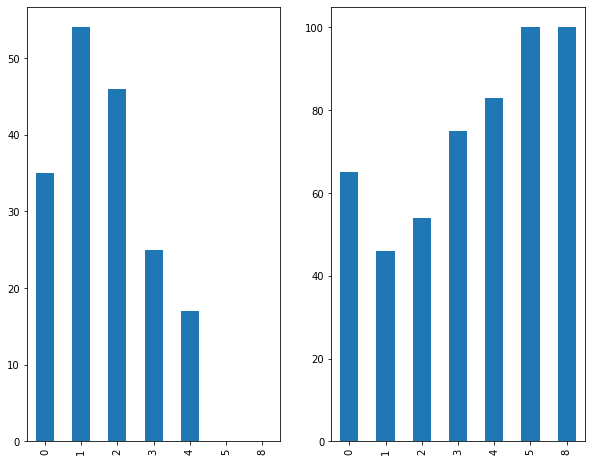

In [68]:
plt.figure(figsize=(10,8))
plt.subplot2grid((1,2),(0,0))
np.round(100*data[data.Survived==1].SibSp.value_counts()/data.SibSp.value_counts()).plot(kind='bar')
plt.subplot2grid((1,2),(0,1))
np.round(100*data[data.Survived==0].SibSp.value_counts()/data.SibSp.value_counts()).plot(kind='bar')

In [69]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Age_binned'],
      dtype='object')

### Parch

In [71]:
data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

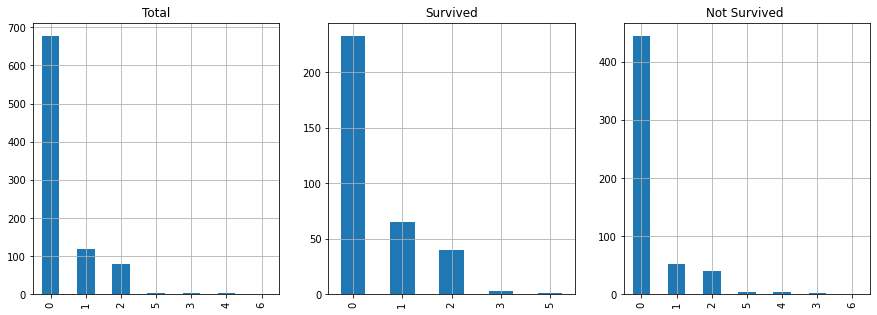

In [72]:
plt.figure(figsize=(15,5))
plt.subplot2grid((1,3),(0,0)).set_title('Total')
data.Parch.value_counts().plot(kind='bar').grid(True)

plt.subplot2grid((1,3),(0,1)).set_title('Survived')
data[data.Survived==1].Parch.value_counts().plot(kind='bar').grid(True)

plt.subplot2grid((1,3),(0,2)).set_title('Not Survived ')
data[data.Survived==0].Parch.value_counts().plot(kind='bar').grid(True)

In [78]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'Age_binned'],
      dtype='object')

In [81]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### Cabin

In [84]:
data.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
D              3
C22 C26        3
              ..
E31            1
E34            1
C70            1
C103           1
D46            1
Name: Cabin, Length: 147, dtype: int64

### Embarked

In [86]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [90]:
100*data[data.Survived==1].Embarked.value_counts()/data.Embarked.value_counts()

S    33.695652
C    55.357143
Q    38.961039
Name: Embarked, dtype: float64

In [91]:
100*data[data.Survived==0].Embarked.value_counts()/data.Embarked.value_counts()

S    66.304348
C    44.642857
Q    61.038961
Name: Embarked, dtype: float64

# Feature Engineering

# Model Build